In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ADVANCED TEXT MINING PART1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [2]:
#=================================================-
#### Slide 17: Import packages  ####

# Helper packages.
import os
import pickle
import pandas as pd
import numpy as np

# Cosine similarity and clustering packages.
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from gensim import matutils

# Network creation and visualization.
import networkx as nx
from pyvis.network import Network

# Other plotting tools.
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
#=================================================-
#### Slide 18: Directory settings  ####

from pathlib import Path
# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()

# Set `main_dir` to the location of your `booz-allen-hamilton` folder.
main_dir = home_dir / "Documents" / "NLP_Intro" / "advanced-text-mining-main"

# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"
# Make `plots_dir` from the `main_dir` and remainder of the path to plots directory.
plot_dir = main_dir / "plots"



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#=================================================-
#### Slide 19: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/amirmokhtari/Documents/NLP_Intro/advanced-text-mining-main/data


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#=================================================-
#### Slide 20: Import data  ####

# Load NYT article data from original file.
NYT = pd.read_csv('NYT_article_data.csv')

# Load pickled data and models.

# Cosine similarity matrix computed from DTM TF-IDF matrix
similarity_df = pickle.load(open("similarity_df.sav","rb"))
similarity = pickle.load(open("similarity.sav","rb"))

# Indices of documents with word counts over `5`
valid_snippets = pickle.load(open("valid_snippets.sav","rb"))

# A list of document id, topic id and topic probability for that document derived from LDA model
doc_topic_pairs_df = pickle.load(open("doc_topic_pairs_df.sav","rb"))

# An array of word counts per snippet.
word_counts_array = pickle.load(open("word_counts_array.sav","rb"))



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
similarity

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.0000002 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.40786082],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40786082,
        1.0000001 ]], dtype=float32)

In [6]:
#=================================================-
#### Slide 21: Compute a graph from similarity object  ####

# Create a graph object from the similarity matrix.
graph = nx.from_pandas_adjacency(similarity_df)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#=================================================-
#### Slide 23: Compute an edgelist from graph  ####

# Convert it to a dataframe in a form of an edgelist.
edgelist_df = nx.to_pandas_edgelist(graph)

# Take a look at the dataframe of edges.
print(edgelist_df.head())
print(edgelist_df.shape)



   source  target    weight
0       0       0  1.000000
1       0       7  0.101372
2       0       8  0.100684
3       0       9  0.052663
4       0      11  0.084635
(6163, 3)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


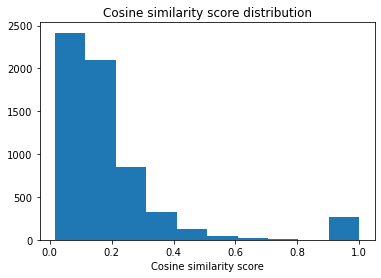

In [8]:
#=================================================-
#### Slide 24: Cosine similarity score distribution  ####

# Plot the weights of edges (i.e. similarity scores).
plt.hist(edgelist_df['weight'])
plt.xlabel('Cosine similarity score')
plt.title('Cosine similarity score distribution')
plt.show()



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


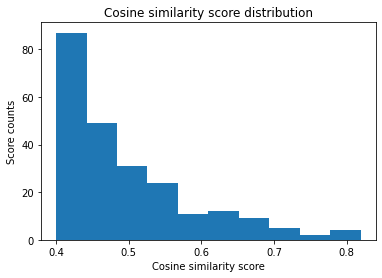

In [9]:
#=================================================-
#### Slide 25: Filter out edges  ####

# Filter out all entries below 0.4 and above 0.9.
edgelist_df = edgelist_df.query('weight>0.4 and weight<0.9')

# Plot the weights of edges (i.e. similarity scores).
plt.hist(edgelist_df['weight'])
plt.xlabel('Cosine similarity score')
plt.ylabel('Score counts')
plt.title('Cosine similarity score distribution')
plt.show()



In [10]:
#=================================================-
#### Slide 26: Check edges data and number of edges  ####

# Take a look at the dataframe of edges.
print(edgelist_df.head())
print(edgelist_df.shape)



     source  target    weight
7         0      17  0.402407
18        0      60  0.412396
127       2     234  0.419921
139       2     219  0.419921
180       3      58  0.616884
(234, 3)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#=================================================-
#### Slide 29: Create network and set base parameters (cont'd)  ####

# Create an empty network object.
network = Network(height="100%",
                  width="60%",
                  bgcolor="#FFFFFF",
                  font_color="#000000")

# Set the physics layout of the network.
network.force_atlas_2based()
network.set_edge_smooth('dynamic')
print(network)



{
    "Nodes": [],
    "Edges": [],
    "Height": "100%",
    "Width": "60%",
    "Heading": ""
}


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#=================================================-
#### Slide 30: Populate network with edge and node data  ####

# Zip columns of edgelist data into a set of tuples.
edge_data = zip(edgelist_df['source'], edgelist_df['target'], edgelist_df['weight'])

# Iterate through the edge data.
for e in edge_data:
    src = e[0] #<- get the source node
    dst = e[1] #<- get the destination (i.e. target node)
    w = e[2]   #<- get the weight of the edge

    # Add a source node with its information.
    network.add_node(src, src, title = src)
    # Add a destination node with its information.
    network.add_node(dst, dst, title = dst)
    # Add an edge between source and destination nodes with weight w.
    network.add_edge(src, dst, value = w)




/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#=================================================-
#### Slide 31: Inspect populated network  ####

print(network.nodes[0:5])
print(network.edges[0:5])



[{'title': 0, 'id': 0, 'label': 0, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 17, 'id': 17, 'label': 17, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 60, 'id': 60, 'label': 60, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 2, 'id': 2, 'label': 2, 'shape': 'dot', 'font': {'color': '#000000'}}, {'title': 234, 'id': 234, 'label': 234, 'shape': 'dot', 'font': {'color': '#000000'}}]
[{'value': 0.4024067223072052, 'from': 0, 'to': 17}, {'value': 0.41239631175994873, 'from': 0, 'to': 60}, {'value': 0.4199207127094269, 'from': 2, 'to': 234}, {'value': 0.4199207127094269, 'from': 2, 'to': 219}, {'value': 0.6168836951255798, 'from': 3, 'to': 58}]


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#=================================================-
#### Slide 32: Get neighbor map for each node  ####

# Get a list of node neighbors.
neighbor_map = network.get_adj_list()

# Show documents most similar to document 17.
print(neighbor_map[17])



{0, 140, 236, 141}


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#=================================================-
#### Slide 33: Add similarity information into the hover over  ####

# Add neighbor data to node hover data.
for node in network.nodes:
    title = "Most similar articles: <br>"
    neighbors = list(neighbor_map[node["id"]])
    title = title + "<br>".join(str(neighbor) for neighbor in neighbors)
    node["title"] = title

print(network.nodes[0])



{'title': 'Most similar articles: <br>17<br>60', 'id': 0, 'label': 0, 'shape': 'dot', 'font': {'color': '#000000'}}


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#=================================================-
#### Slide 34: Save and show the network graph  ####

# Save html and show graph in browser.
network.show(os.path.join(plot_dir , "NYT_similar_snippets.html"))



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
plot_dir

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PosixPath('/Users/amirmokhtari/Documents/NLP_Intro/advanced-text-mining-main/plots')

In [25]:
#=================================================-
#### Slide 37: What does "most similar articles" mean?  ####

edgelist_df_subset = edgelist_df.query("source==31")
print(edgelist_df_subset)



      source  target    weight
1321      31      77  0.539880
1326      31     115  0.485577
1328      31     118  0.659343
1331      31     223  0.659343
1332      31     200  0.401721
1334      31     192  0.526407
1338      31     193  0.447311
1344      31     163  0.423019


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#=================================================-
#### Slide 38: Look up the similar article pairs  ####

print(edgelist_df_subset)
print(NYT.iloc[31, 2])
print(NYT.iloc[118, 2])
print(NYT.iloc[223, 2])



      source  target    weight
1321      31      77  0.539880
1326      31     115  0.485577
1328      31     118  0.659343
1331      31     223  0.659343
1332      31     200  0.401721
1334      31     192  0.526407
1338      31     193  0.447311
1344      31     163  0.423019
The Latest on a regional meeting about Venezuela's political crisis. (all times local):
The Latest on the fatal shooting of a 7-year-old girl in Houston (all times local):
The Latest on California Gov.-elect Gavin Newsom's inauguration (all times local):


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#=================================================-
#### Slide 39: Show buttons to modify graph look  ####

# Show buttons to modify the look.
network.show_buttons(filter_=['physics'])

# Save html and show graph in browser.
network.show(plot_dir+"/NYT_similar_snippets.html")



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str'

In [ ]:
#=================================================-
#### Slide 45: Hierarchical clustering: compute distance  ####

# Compute distance matrix by subtracting similarity from 1.
distance = 1 - similarity



In [ ]:
#=================================================-
#### Slide 53: Exercise 1  ####





In [ ]:
#=================================================-
#### Slide 54: Compute and interpret linkage matrix  ####

# Define the `linkage_matrix` using
# `ward` clustering algorithm.
linkage_matrix = ward(distance)
print(linkage_matrix[0:10])



In [ ]:
#=================================================-
#### Slide 56: Compute and interpret linkage matrix (cont'd)  ####

# Print shape of the matrix.
print(linkage_matrix.shape)



In [ ]:
#=================================================-
#### Slide 57: Compute and interpret linkage matrix (cont'd)  ####

print(linkage_matrix[0:2])



In [ ]:
#=================================================-
#### Slide 58: Compute and interpret linkage matrix (cont'd)  ####

print(linkage_matrix[150])



In [ ]:
#=================================================-
#### Slide 59: Compute and interpret linkage matrix (cont'd)  ####

print(linkage_matrix[246])



In [ ]:
#=================================================-
#### Slide 61: Hierarchical clustering: visualize results  ####

# Now we can plot the hierarchical clusters.
fig, axes = plt.subplots(figsize = (15, 40))
axes = dendrogram(linkage_matrix,
                  orientation = "right",
                  labels = valid_snippets,
                  leaf_font_size = 11)



In [ ]:
#=================================================-
#### Slide 63: Hierarchical clustering: get cluster labels  ####

# Set k - the max number of clusters.
k = 5

# Get cluster labels for each snippet.
cluster_labels = fcluster(linkage_matrix,         #<- linkage matrix
                          k,                      #<- max number of clusters
                          criterion = 'maxclust') #<- criterion maxclust

print(cluster_labels)



In [ ]:
#=================================================-
#### Slide 64: Combine data with hclust and LDA cluster labels  ####

NYT_valid_articles = NYT.loc[valid_snippets]
NYT_valid_articles['hclust_label'] = cluster_labels
doc_topic_pairs_df = doc_topic_pairs_df.sort_values(by = "doc_id")
NYT_valid_articles['LDA_topic_label'] = doc_topic_pairs_df['best_topic']



In [ ]:
#=================================================-
#### Slide 65: Save plots and data  ####

fig.savefig(plot_dir + '/NYT_hclust.png')
NYT_valid_articles.to_csv(data_dir + '/NYT_snippets_with_cluster_labels.csv')



In [ ]:
#=================================================-
#### Slide 68: Exercise 2  ####


